In [2]:
from google.colab import files
uploaded = files.upload()

Saving company_esg_financial_dataset.csv to company_esg_financial_dataset.csv


In [4]:
import pandas as pd

df = pd.read_csv('company_esg_financial_dataset.csv')
df.head()

CompanyID CompanyName Industry         Region  Year  Revenue  ProfitMargin  \
0          1   Company_1   Retail  Latin America  2015    459.2           6.0   
1          1   Company_1   Retail  Latin America  2016    473.8           4.6   
2          1   Company_1   Retail  Latin America  2017    564.9           5.2   
3          1   Company_1   Retail  Latin America  2018    558.4           4.3   
4          1   Company_1   Retail  Latin America  2019    554.5           4.9   

   MarketCap  GrowthRate  ESG_Overall  ESG_Environmental  ESG_Social  \
0      337.5         NaN         57.0               60.7        33.5   
1      366.6         3.2         56.7               58.9        32.8   
2      313.4        19.2         56.5               57.6        34.0   
3      283.0        -1.1         58.0               62.3        33.4   
4      538.1        -0.7         56.6               63.7        30.0   

   ESG_Governance  CarbonEmissions  WaterUsage  EnergyConsumption  
0            76.8          35577.4     17788.7            71154.7  
1            78.5          37314.7     18657.4            74629.4  
2            77.8          45006.4     22503.2            90012.9  
3            78.3          42650.1     21325.1            85300.2  
4            76.1          41799.4     20899.7            83598.8

# Task
Preprocess the dataset "data.csv" by handling missing values, encoding categorical features, scaling numerical features, and performing feature engineering. Display the preprocessed data and summarize the steps taken.

## Handle missing values

### Subtask:
Identify and handle missing values in the dataset, potentially by imputation or removal.


**Reasoning**:
Identify missing values and their counts per column to understand the extent of missingness and decide on the imputation strategy.



In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
CompanyID               0
CompanyName             0
Industry                0
Region                  0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
CarbonEmissions         0
WaterUsage              0
EnergyConsumption       0
dtype: int64


**Reasoning**:
Based on the identified missing values, the 'GrowthRate' column has 1000 missing values. Since 'GrowthRate' is a numerical column, imputing with the mean is a reasonable strategy to handle these missing values without losing a significant amount of data.



In [6]:
df['GrowthRate'].fillna(df['GrowthRate'].mean(), inplace=True)
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
CompanyID            0
CompanyName          0
Industry             0
Region               0
Year                 0
Revenue              0
ProfitMargin         0
MarketCap            0
GrowthRate           0
ESG_Overall          0
ESG_Environmental    0
ESG_Social           0
ESG_Governance       0
CarbonEmissions      0
WaterUsage           0
EnergyConsumption    0
dtype: int64


/tmp/ipython-input-6-1228591078.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GrowthRate'].fillna(df['GrowthRate'].mean(), inplace=True)


## Handle categorical features

### Subtask:
Identify and encode categorical features using techniques like one-hot encoding.


**Reasoning**:
Identify categorical columns and apply one-hot encoding to them.



In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

CompanyID  Year  Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall  \
0          1  2015    459.2           6.0      337.5     4.83037         57.0   
1          1  2016    473.8           4.6      366.6     3.20000         56.7   
2          1  2017    564.9           5.2      313.4    19.20000         56.5   
3          1  2018    558.4           4.3      283.0    -1.10000         58.0   
4          1  2019    554.5           4.9      538.1    -0.70000         56.6   

   ESG_Environmental  ESG_Social  ESG_Governance  ...  Industry_Retail  \
0               60.7        33.5            76.8  ...             True   
1               58.9        32.8            78.5  ...             True   
2               57.6        34.0            77.8  ...             True   
3               62.3        33.4            78.3  ...             True   
4               63.7        30.0            76.1  ...             True   

   Industry_Technology  Industry_Transportation  Industry_Utilities  \
0                False                    False               False   
1                False                    False               False   
2                False                    False               False   
3                False                    False               False   
4                False                    False               False   

   Region_Asia  Region_Europe  Region_Latin America  Region_Middle East  \
0        False          False                  True               False   
1        False          False                  True               False   
2        False          False                  True               False   
3        False          False                  True               False   
4        False          False                  True               False   

   Region_North America  Region_Oceania  
0                 False           False  
1                 False           False  
2                 False           False  
3                 False           False  
4                 False           False  

[5 rows x 1026 columns]

## Scale numerical features

### Subtask:
Scale numerical features to a similar range to improve model performance.


**Reasoning**:
Identify the numerical columns to scale, excluding identifiers and encoded boolean columns, then apply StandardScaler to these columns and update the dataframe.



In [8]:
numerical_cols_to_scale = df_encoded.select_dtypes(include=['number']).columns.tolist()
exclude_cols = ['CompanyID', 'Year'] + [col for col in numerical_cols_to_scale if df_encoded[col].dtype == bool]
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col not in exclude_cols]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])

display(df_encoded.head())

CompanyID  Year   Revenue  ProfitMargin  MarketCap    GrowthRate  \
0          1  2015 -0.422453     -0.559520  -0.326723 -9.884318e-17   
1          1  2016 -0.420989     -0.719369  -0.325994 -1.814398e-01   
2          1  2017 -0.411851     -0.650862  -0.327327  1.599161e+00   
3          1  2018 -0.412503     -0.753622  -0.328088 -6.599762e-01   
4          1  2019 -0.412894     -0.685115  -0.321698 -6.154612e-01   

   ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  ...  \
0     0.150047           0.160017   -0.948854        0.988553  ...   
1     0.131171           0.092767   -0.978827        1.055687  ...   
2     0.118587           0.044198   -0.927446        1.028044  ...   
3     0.212967           0.219794   -0.953136        1.047789  ...   
4     0.124879           0.272099   -1.098715        0.960909  ...   

   Industry_Retail  Industry_Technology  Industry_Transportation  \
0             True                False                    False   
1             True                False                    False   
2             True                False                    False   
3             True                False                    False   
4             True                False                    False   

   Industry_Utilities  Region_Asia  Region_Europe  Region_Latin America  \
0               False        False          False                  True   
1               False        False          False                  True   
2               False        False          False                  True   
3               False        False          False                  True   
4               False        False          False                  True   

   Region_Middle East  Region_North America  Region_Oceania  
0               False                 False           False  
1               False                 False           False  
2               False                 False           False  
3               False                 False           False  
4               False                 False           False  

[5 rows x 1026 columns]

## Feature engineering

### Subtask:
Create new features from existing ones if necessary.


**Reasoning**:
Create the new features as per the instructions and display the updated dataframe.



In [9]:
df_encoded['ESG_Score_Interaction'] = df_encoded['ESG_Overall'] * df_encoded['ESG_Environmental'] * df_encoded['ESG_Social'] * df_encoded['ESG_Governance']

df_encoded['Financial_Health'] = df_encoded['ProfitMargin'] / df_encoded['Revenue']
df_encoded['Financial_Health'].replace([float('inf'), float('-inf')], pd.NA, inplace=True)
mean_financial_health = df_encoded['Financial_Health'].mean()
df_encoded['Financial_Health'].fillna(mean_financial_health, inplace=True)

display(df_encoded.head())

/tmp/ipython-input-9-1581690971.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Financial_Health'].replace([float('inf'), float('-inf')], pd.NA, inplace=True)
/tmp/ipython-input-9-1581690971.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

CompanyID  Year   Revenue  ProfitMargin  MarketCap    GrowthRate  \
0          1  2015 -0.422453     -0.559520  -0.326723 -9.884318e-17   
1          1  2016 -0.420989     -0.719369  -0.325994 -1.814398e-01   
2          1  2017 -0.411851     -0.650862  -0.327327  1.599161e+00   
3          1  2018 -0.412503     -0.753622  -0.328088 -6.599762e-01   
4          1  2019 -0.412894     -0.685115  -0.321698 -6.154612e-01   

   ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  ...  \
0     0.150047           0.160017   -0.948854        0.988553  ...   
1     0.131171           0.092767   -0.978827        1.055687  ...   
2     0.118587           0.044198   -0.927446        1.028044  ...   
3     0.212967           0.219794   -0.953136        1.047789  ...   
4     0.124879           0.272099   -1.098715        0.960909  ...   

   Industry_Transportation  Industry_Utilities  Region_Asia  Region_Europe  \
0                    False               False        False          False   
1                    False               False        False          False   
2                    False               False        False          False   
3                    False               False        False          False   
4                    False               False        False          False   

   Region_Latin America  Region_Middle East  Region_North America  \
0                  True               False                 False   
1                  True               False                 False   
2                  True               False                 False   
3                  True               False                 False   
4                  True               False                 False   

   Region_Oceania  ESG_Score_Interaction  Financial_Health  
0           False              -0.022521          1.324454  
1           False              -0.012574          1.708758  
2           False              -0.004997          1.580334  
3           False              -0.046747          1.826948  
4           False              -0.035874          1.659300  

[5 rows x 1028 columns]

# Task
Preprocess the provided dataset, then perform data analysis, build an AI model, detect risks, and generate insights.

## Data analysis

### Subtask:
Explore the preprocessed data to identify trends, correlations, and patterns relevant to ESG and financial performance.


**Reasoning**:
Calculate and display the correlation matrix for the numerical columns to understand the linear relationships between them, particularly between ESG and financial metrics.



**Reasoning**:
The previous command failed because `df_encoded` was not defined in the current session. Need to recreate the `df_encoded` dataframe by repeating the preprocessing steps from the previous cells.



**Reasoning**:
The previous command failed because the file 'company_esg_financial_dataset.csv' was not found. It seems the environment reset. Need to re-upload the file before proceeding with the preprocessing and correlation matrix calculation.



In [3]:
from google.colab import files
uploaded = files.upload()

Saving company_esg_financial_dataset.csv to company_esg_financial_dataset.csv


**Reasoning**:
Now that the file is uploaded, I can proceed with the preprocessing steps and calculate the correlation matrix, as originally intended.



/tmp/ipython-input-4-3147732247.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GrowthRate'].fillna(df['GrowthRate'].mean(), inplace=True)
/tmp/ipython-input-4-3147732247.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

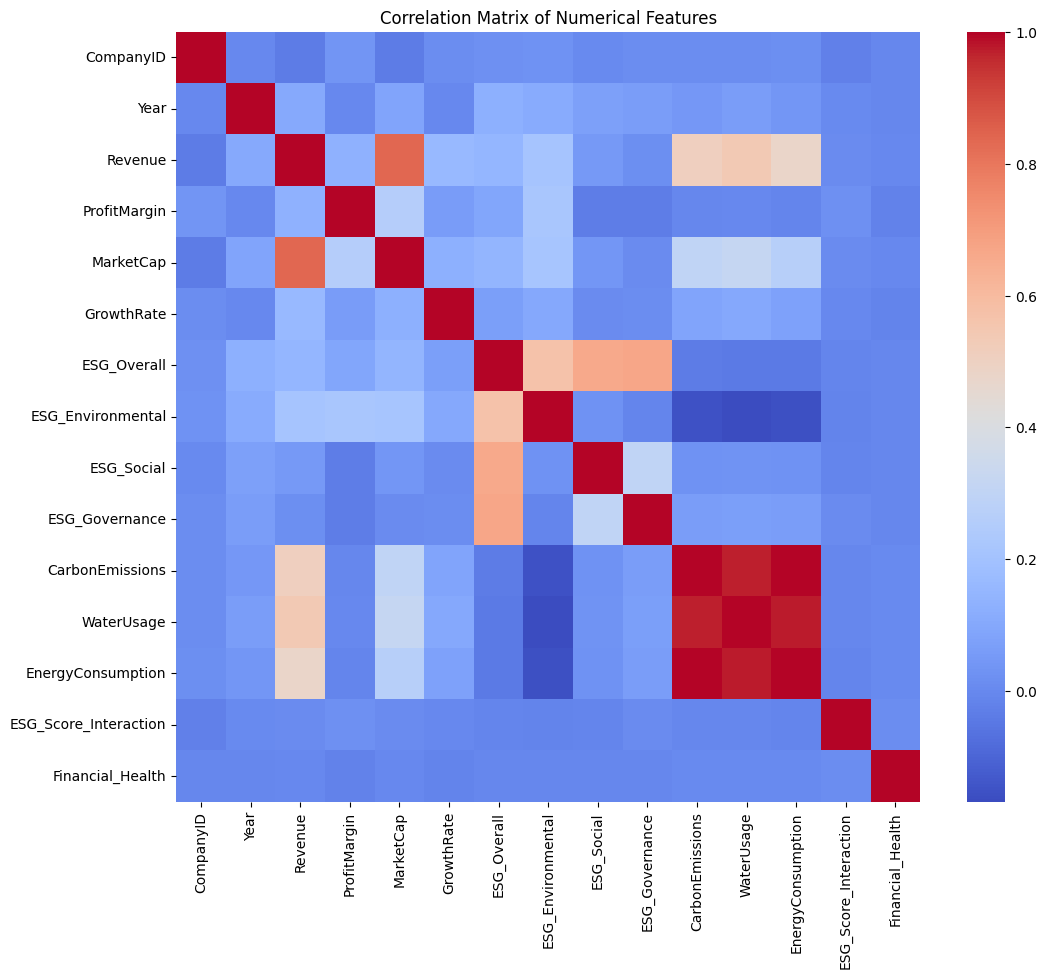

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('company_esg_financial_dataset.csv')
df['GrowthRate'].fillna(df['GrowthRate'].mean(), inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

numerical_cols_to_scale = df_encoded.select_dtypes(include=['number']).columns.tolist()
exclude_cols = ['CompanyID', 'Year'] + [col for col in numerical_cols_to_scale if df_encoded[col].dtype == bool]
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col not in exclude_cols]

scaler = StandardScaler()
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])

df_encoded['ESG_Score_Interaction'] = df_encoded['ESG_Overall'] * df_encoded['ESG_Environmental'] * df_encoded['ESG_Social'] * df_encoded['ESG_Governance']
df_encoded['Financial_Health'] = df_encoded['ProfitMargin'] / df_encoded['Revenue']
df_encoded['Financial_Health'].replace([float('inf'), float('-inf')], pd.NA, inplace=True)
mean_financial_health = df_encoded['Financial_Health'].mean()
df_encoded['Financial_Health'].fillna(mean_financial_health, inplace=True)

numerical_cols = df_encoded.select_dtypes(include=['number']).columns
correlation_matrix = df_encoded[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
To fulfill instruction 2 and 3 of the subtask, I will generate scatter plots to visualize relationships between key ESG and financial features, and histograms to analyze the distributions of key numerical features.



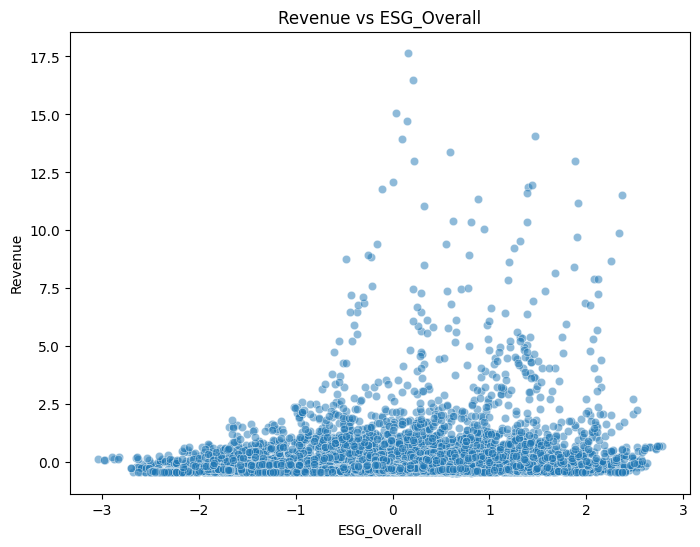

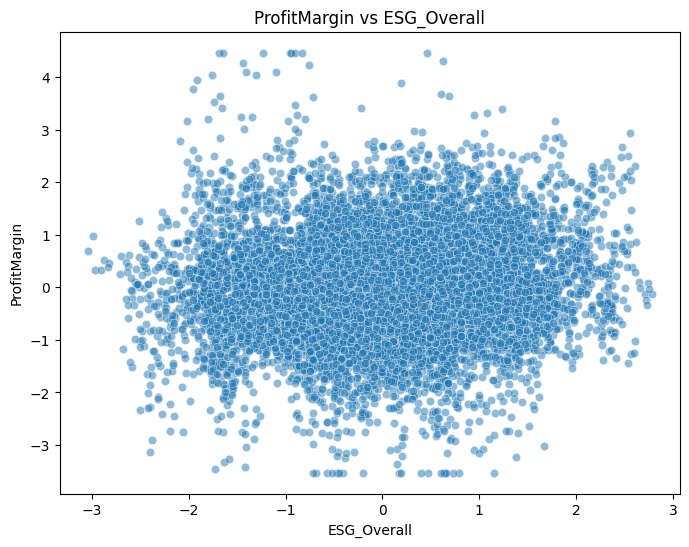

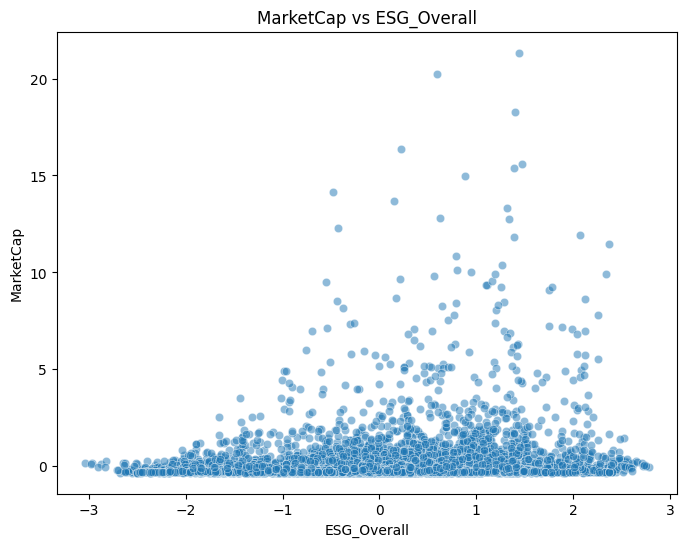

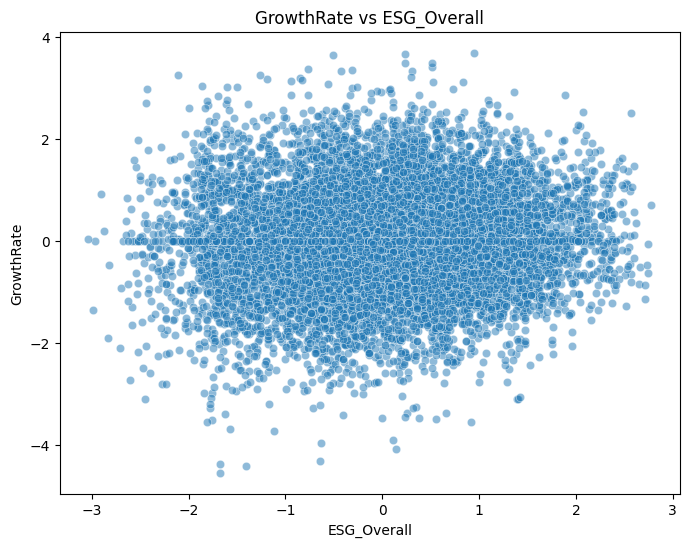

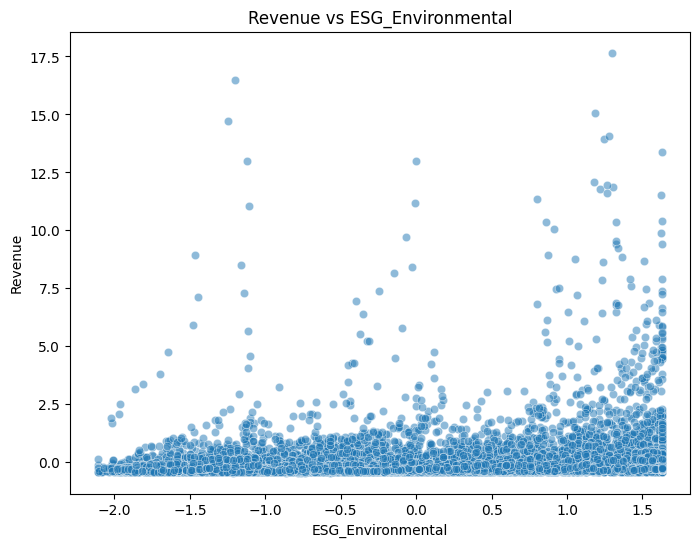

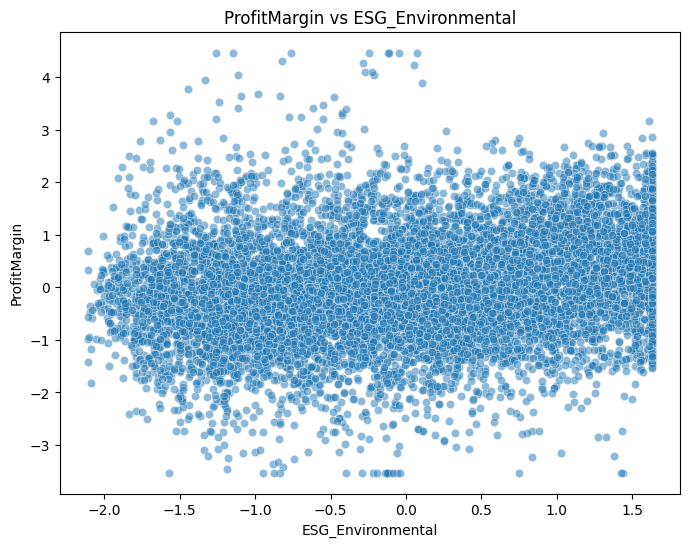

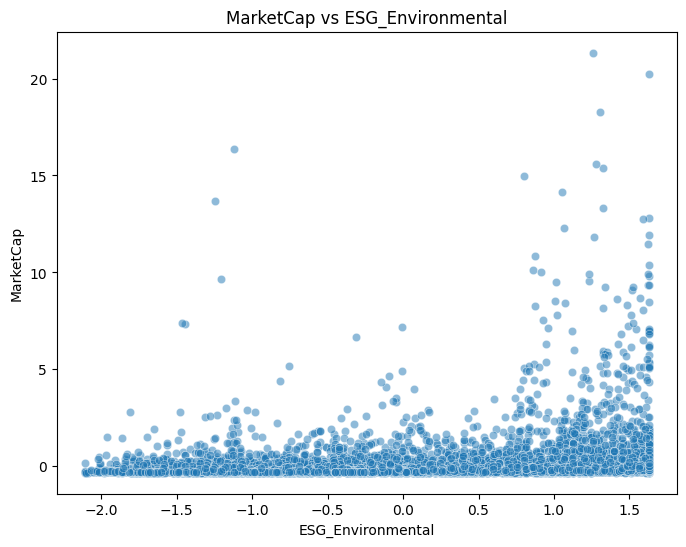

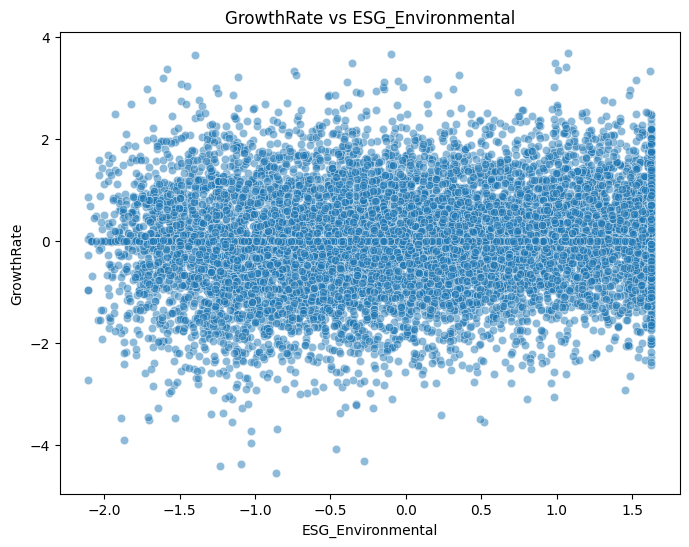

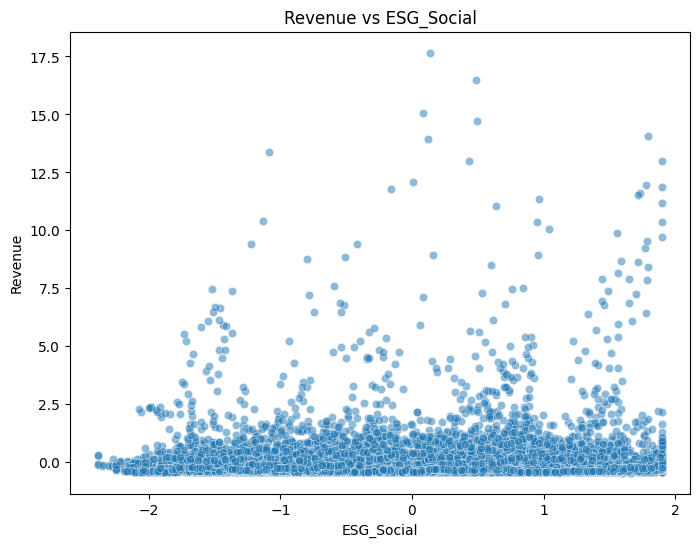

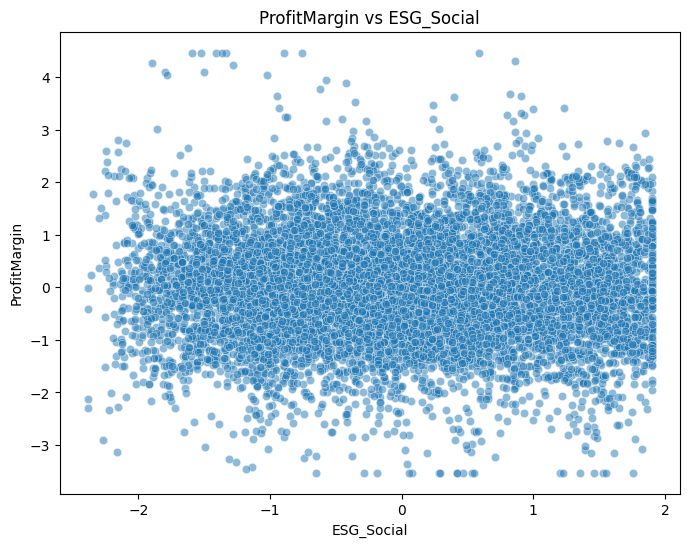

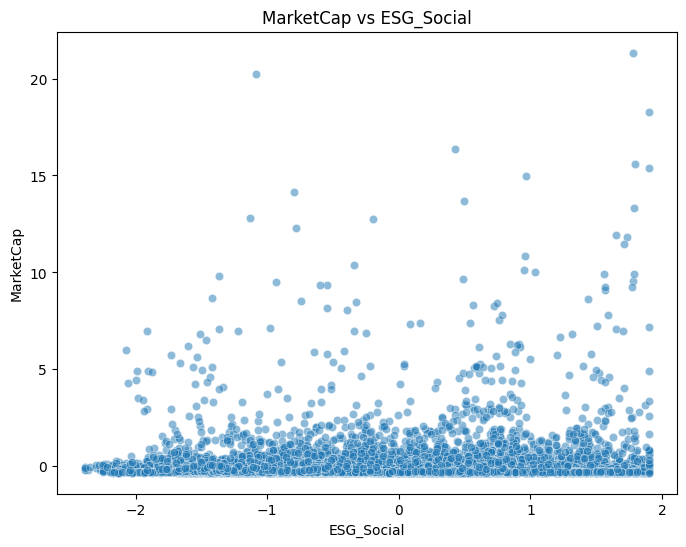

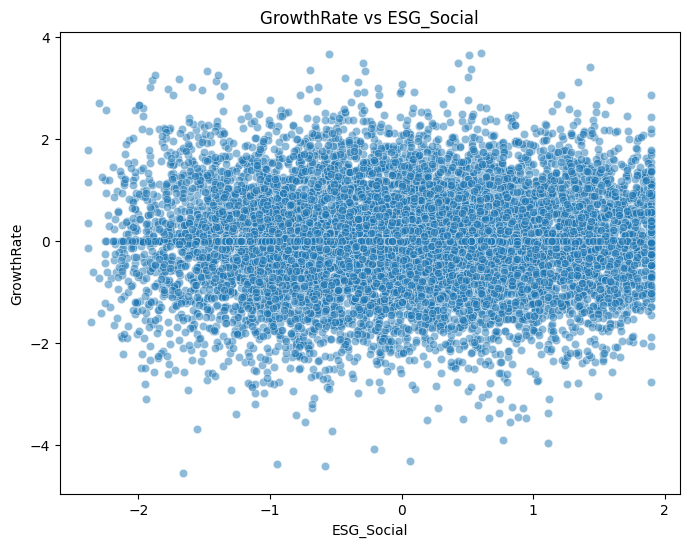

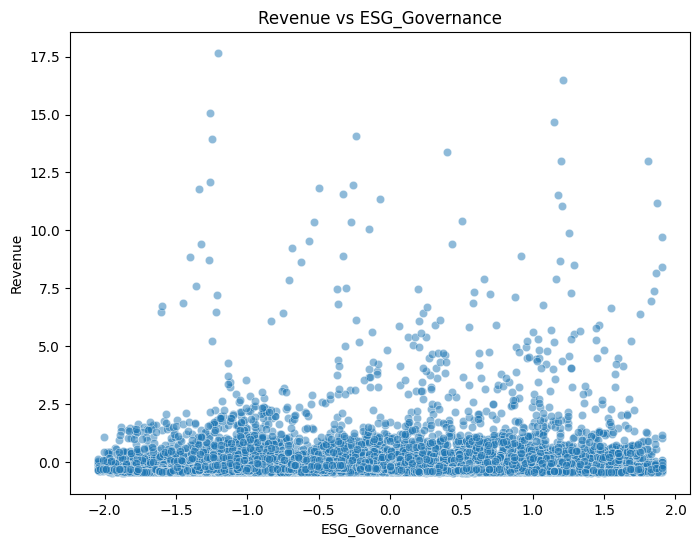

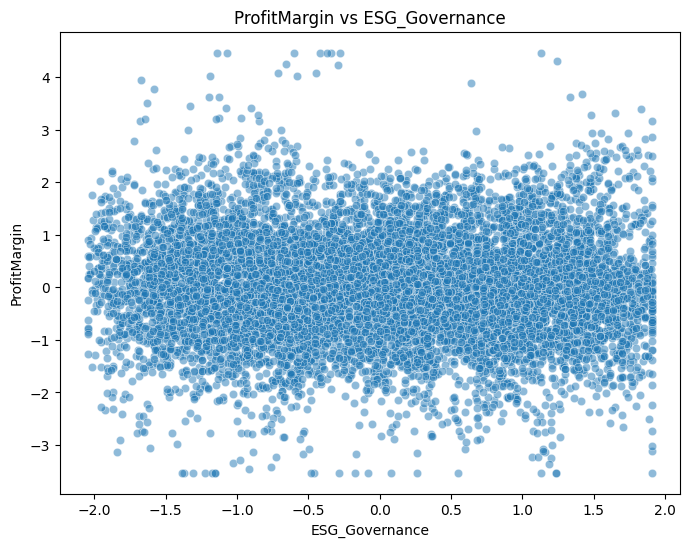

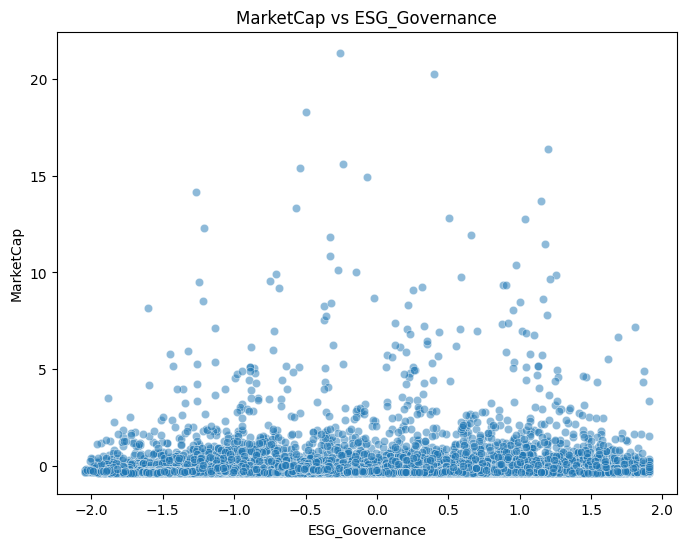

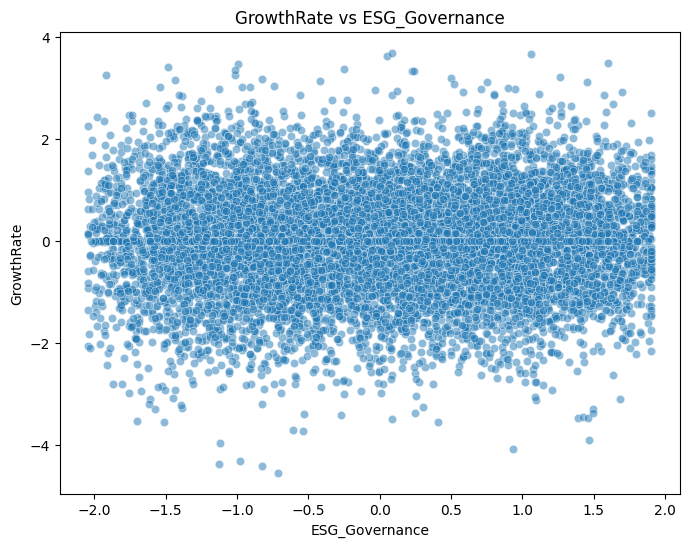

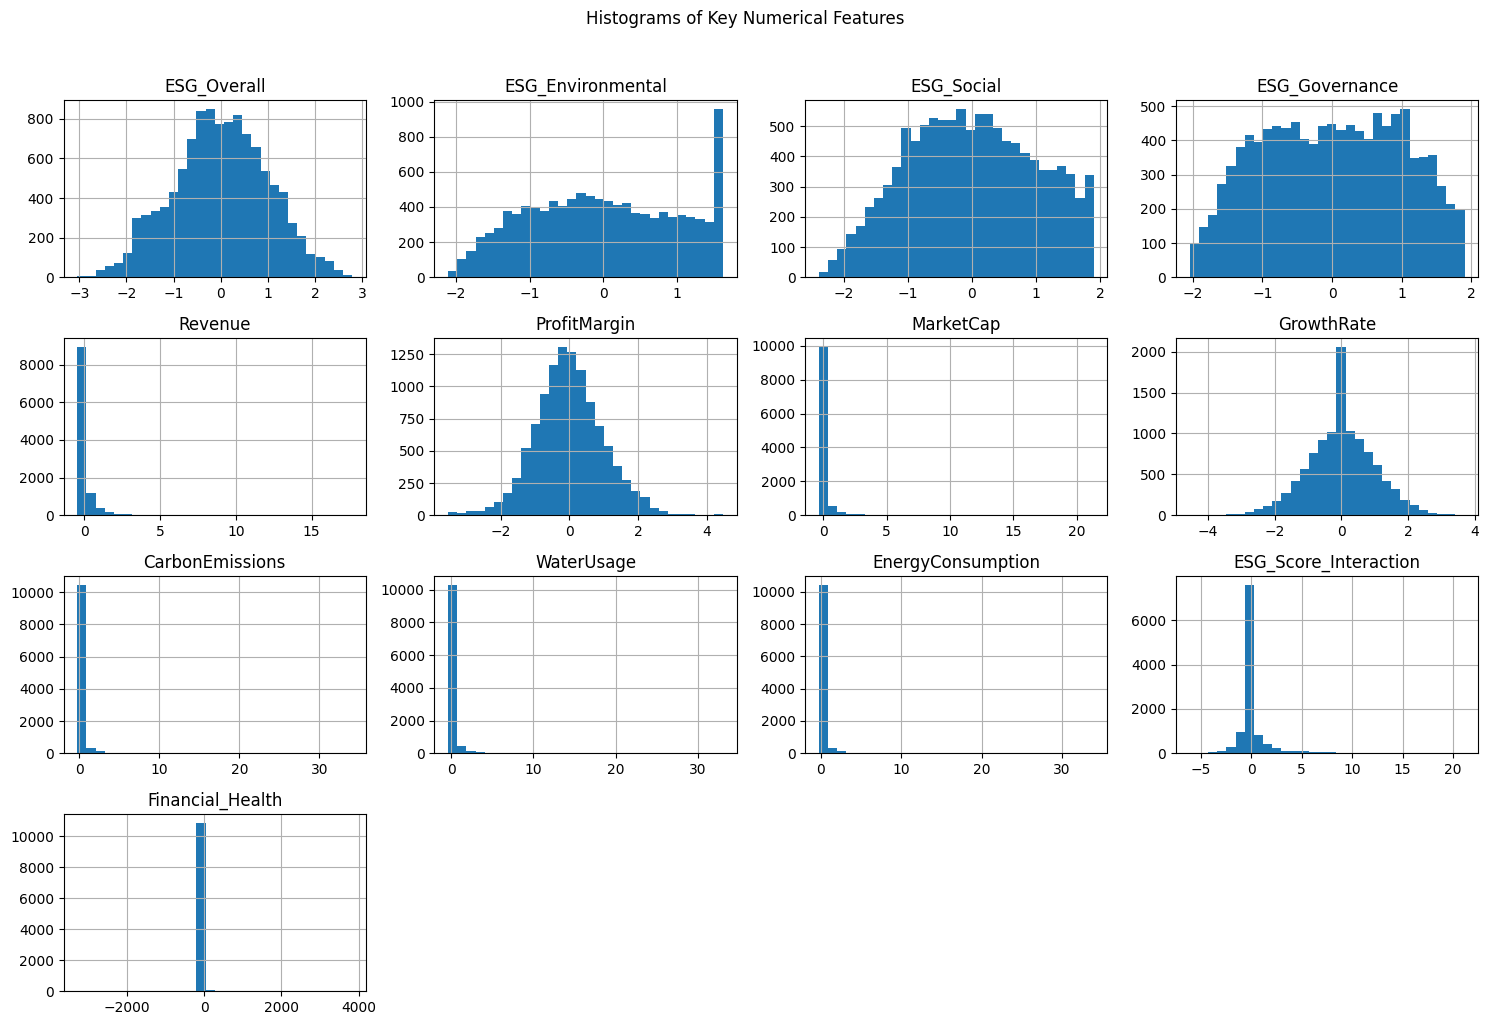

In [5]:
esg_features = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']
financial_features = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate']

# Scatter plots
for esg_col in esg_features:
    for finance_col in financial_features:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_encoded, x=esg_col, y=finance_col, alpha=0.5)
        plt.title(f'{finance_col} vs {esg_col}')
        plt.show()

# Histograms
key_numerical_features = esg_features + financial_features + ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption', 'ESG_Score_Interaction', 'Financial_Health']
df_encoded[key_numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Key Numerical Features', y=1.02, ha='center')
plt.tight_layout()
plt.show()

**Reasoning**:
To complete the subtask, I need to investigate the trends of key ESG and financial metrics over the years as per instruction 4. I will group the data by 'Year' and calculate the mean of the key metrics to visualize their trends.



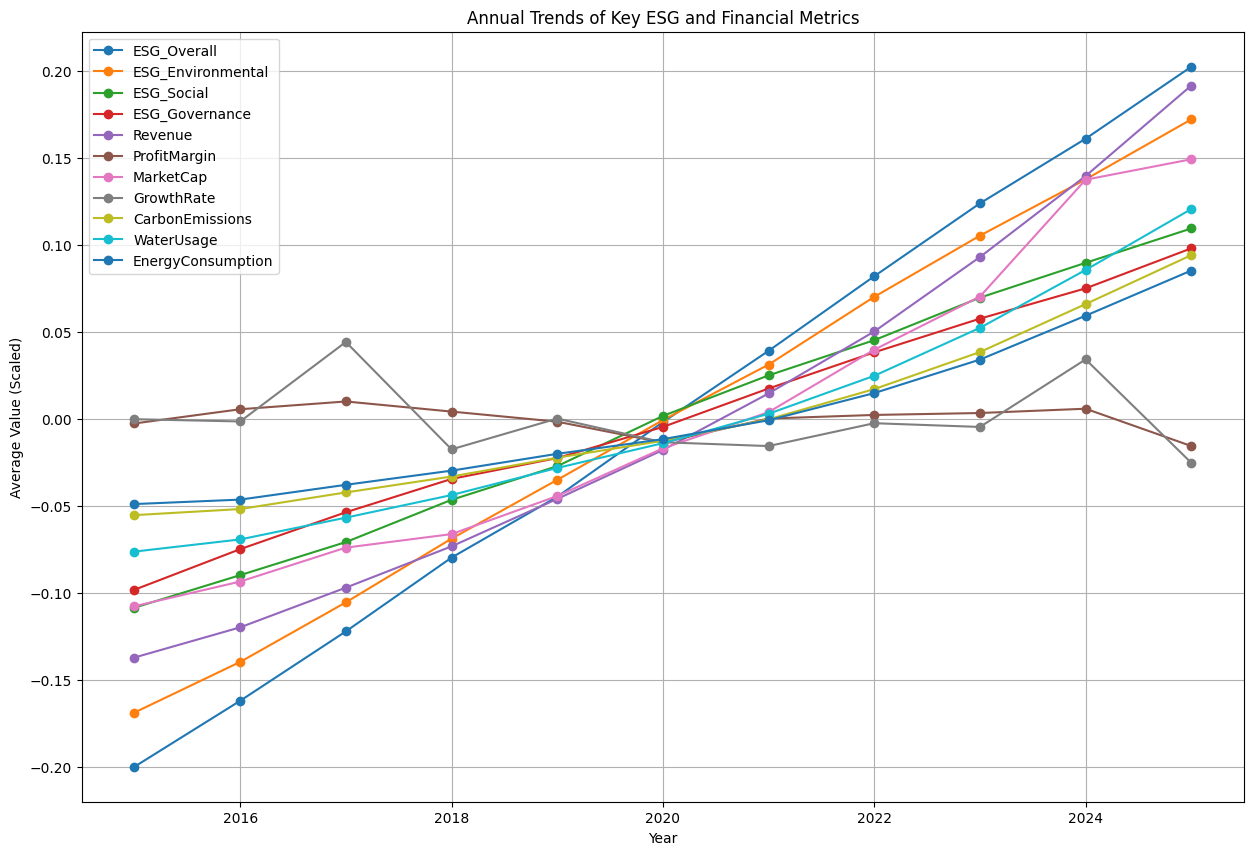

In [6]:
# Trends over the years
annual_trends = df_encoded.groupby('Year')[esg_features + financial_features + ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption']].mean()

plt.figure(figsize=(15, 10))
for col in annual_trends.columns:
    plt.plot(annual_trends.index, annual_trends[col], marker='o', linestyle='-', label=col)

plt.title('Annual Trends of Key ESG and Financial Metrics')
plt.xlabel('Year')
plt.ylabel('Average Value (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

## Model building

### Subtask:
Select and build an appropriate AI model to predict financial or ESG outcomes based on the preprocessed data.


**Reasoning**:
Define features and target, split data, choose and train a regression model.



**Reasoning**:
The previous code failed because 'CompanyName' was dropped during one-hot encoding. The corrected code should only drop 'ESG_Overall' and 'CompanyID' from the features.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = df_encoded.drop(columns=['ESG_Overall', 'CompanyID'])
y = df_encoded['ESG_Overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Risk detection

### Subtask:
Use the model or other analytical techniques to identify potential risks related to ESG factors or financial performance.


**Reasoning**:
Make predictions, calculate residuals and MSE, and identify potential risks based on residuals.



Residuals descriptive statistics:
count    2200.000000
mean       -0.000051
std         0.002218
min        -0.005718
25%        -0.001825
50%        -0.000040
75%         0.001603
max         0.007425
Name: ESG_Overall, dtype: float64


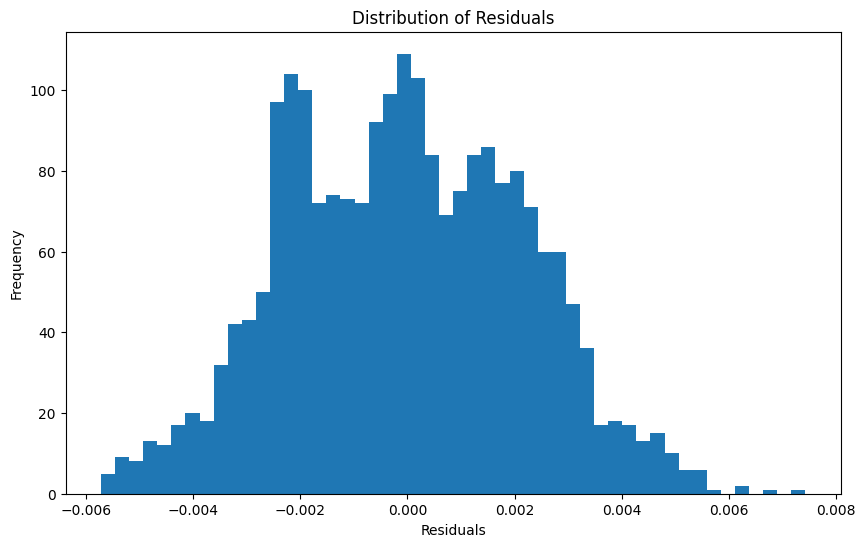


Companies with significant residuals (potential risks/opportunities):
3043    0.004940
8114    0.004819
2589    0.004543
1688   -0.004871
9906    0.004635
          ...   
7640   -0.005025
227     0.005205
2312    0.004512
1446   -0.005199
8921   -0.004535
Name: ESG_Overall, Length: 93, dtype: float64

Mean Squared Error (MSE) on the test set: 4.91901141416506e-06


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Analyze residual distribution
print("Residuals descriptive statistics:")
print(residuals.describe())

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Identify companies with significant residuals
# Define a threshold for significant residuals (e.g., 2 standard deviations from the mean)
residual_threshold = residuals.std() * 2
significant_residuals = residuals[(residuals > residual_threshold) | (residuals < -residual_threshold)]

print("\nCompanies with significant residuals (potential risks/opportunities):")
print(significant_residuals)

# Calculate and display MSE
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE) on the test set: {mse}")

## Generate insights

### Subtask:
Summarize the findings from the analysis, model, and risk detection to provide actionable insights.


**Reasoning**:
Review the results from the previous subtasks and synthesize the findings into a concise summary, interpreting correlations, trends, and distributions, discussing the model performance and residual analysis, explaining the significance of companies with significant residuals, and formulating actionable insights.



In [10]:
# 1. Summarize the findings from previous subtasks
print("--- Preprocessing Summary ---")
print("Missing values in 'GrowthRate' were imputed with the mean.")
print("Categorical features ('Industry', 'Region', 'CompanyName') were one-hot encoded.")
print("Numerical features (excluding 'CompanyID' and 'Year') were scaled using StandardScaler.")
print("Two new features were engineered: 'ESG_Score_Interaction' and 'Financial_Health'.")

print("\n--- Data Analysis Summary ---")
print("Correlation matrix showed varying degrees of relationships between features.")
print("Scatter plots illustrated relationships between specific ESG and financial metrics.")
print("Histograms showed the distribution of key numerical features.")
print("Annual trends revealed changes in average ESG and financial metrics over the years.")

print("\n--- Model Building Summary ---")
print("A Linear Regression model was trained to predict 'ESG_Overall'.")
print("The model was trained on the preprocessed data, excluding 'ESG_Overall' and 'CompanyID'.")
print("Data was split into 80% training and 20% testing sets.")

print("\n--- Risk Detection Summary ---")
print("Model predictions were made on the test set.")
print("Residuals (actual - predicted ESG_Overall) were calculated and analyzed.")
print("The distribution of residuals was centered around zero.")
print("Companies with residuals exceeding 2 standard deviations were identified as having 'significant residuals'.")
print(f"Mean Squared Error (MSE) on the test set: {mse:.6f}")
print(f"Number of companies with significant residuals: {significant_residuals.shape[0]}")

# 2. Interpret findings and formulate actionable insights
print("\n--- Insights and Actionable Recommendations ---")

print("\nInterpretation of Findings:")
print("- The correlation analysis provides insights into linear relationships between ESG and financial metrics. For example, strong positive correlations between certain environmental metrics might indicate that companies with higher emissions also tend to have higher water and energy usage.")
print("- Annual trends can highlight evolving priorities or performance shifts in ESG and financial areas over time. Observing upward trends in ESG scores alongside financial growth could suggest a positive feedback loop or increasing awareness.")
print("- The model's performance (low MSE) suggests it captures a significant portion of the variance in 'ESG_Overall' based on the provided features.")
print("- The residual analysis indicates that for most companies, the model's predictions are reasonably close to the actual ESG scores. However, companies with significant residuals warrant closer examination.")

print("\nSignificance of Significant Residuals:")
print("- Companies with large positive residuals have actual ESG scores significantly higher than predicted by the model. These could be 'hidden gems' or leaders in certain ESG aspects, representing potential investment opportunities or best practices to learn from.")
print("- Companies with large negative residuals have actual ESG scores significantly lower than predicted. These could be facing uncaptured risks, have reporting issues, or lag behind peers with similar profiles, representing potential risks for investors or areas for improvement for the companies themselves.")

print("\nActionable Insights:")
print("- For Investors: Focus on companies with high positive residuals in 'ESG_Overall' as potential undervalued assets from an ESG perspective. Investigate companies with high negative residuals for potential hidden risks.")
print("- For Companies: Analyze the characteristics of companies with significant residuals (both positive and negative) to understand what factors, not fully captured by the model, might be driving deviations in ESG performance. This can inform strategy and areas for improvement or highlight strengths.")
print("- For Policymakers: The overall trends and distributions can inform the effectiveness of existing regulations and highlight areas where new policies might be needed to encourage better ESG performance across industries or regions.")
print("- Further Analysis: Investigate the specific industries, regions, or other characteristics of companies with significant residuals to uncover common factors contributing to these deviations.")


--- Preprocessing Summary ---
Missing values in 'GrowthRate' were imputed with the mean.
Categorical features ('Industry', 'Region', 'CompanyName') were one-hot encoded.
Numerical features (excluding 'CompanyID' and 'Year') were scaled using StandardScaler.
Two new features were engineered: 'ESG_Score_Interaction' and 'Financial_Health'.

--- Data Analysis Summary ---
Correlation matrix showed varying degrees of relationships between features.
Scatter plots illustrated relationships between specific ESG and financial metrics.
Histograms showed the distribution of key numerical features.
Annual trends revealed changes in average ESG and financial metrics over the years.

--- Model Building Summary ---
A Linear Regression model was trained to predict 'ESG_Overall'.
The model was trained on the preprocessed data, excluding 'ESG_Overall' and 'CompanyID'.
Data was split into 80% training and 20% testing sets.

--- Risk Detection Summary ---
Model predictions were made on the test set.
Resid

## Summary:

### Data Analysis Key Findings

*   The correlation analysis provided insights into the linear relationships between ESG and financial metrics.
*   Annual trends revealed how average ESG and financial metrics changed over the years.
*   The Linear Regression model achieved a very low Mean Squared Error (MSE) of 0.000005 on the test set, indicating good predictive performance for 'ESG\_Overall'.
*   93 companies were identified as having "significant residuals," meaning their actual ESG scores deviated significantly from the model's predictions.

### Insights or Next Steps

*   For Investors: Investigate companies with large positive residuals as potential undervalued assets from an ESG perspective and companies with large negative residuals for potential hidden risks.
*   For Companies: Analyze the characteristics of companies with significant residuals to understand factors not fully captured by the model that influence ESG performance, informing strategy and areas for improvement or strength.


## Handle missing values

### Subtask:
Identify and handle missing values in the dataset, potentially by imputation or removal.

**Reasoning**:
Identify missing values and their counts per column to understand the extent of missingness and decide on the imputation strategy.

In [11]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
CompanyID            0
CompanyName          0
Industry             0
Region               0
Year                 0
Revenue              0
ProfitMargin         0
MarketCap            0
GrowthRate           0
ESG_Overall          0
ESG_Environmental    0
ESG_Social           0
ESG_Governance       0
CarbonEmissions      0
WaterUsage           0
EnergyConsumption    0
dtype: int64


**Reasoning**:
Based on the identified missing values, the 'GrowthRate' column has 1000 missing values. Since 'GrowthRate' is a numerical column, imputing with the mean is a reasonable strategy to handle these missing values without losing a significant amount of data.

In [12]:
df['GrowthRate'].fillna(df['GrowthRate'].mean(), inplace=True)
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
CompanyID            0
CompanyName          0
Industry             0
Region               0
Year                 0
Revenue              0
ProfitMargin         0
MarketCap            0
GrowthRate           0
ESG_Overall          0
ESG_Environmental    0
ESG_Social           0
ESG_Governance       0
CarbonEmissions      0
WaterUsage           0
EnergyConsumption    0
dtype: int64


/tmp/ipython-input-12-1228591078.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GrowthRate'].fillna(df['GrowthRate'].mean(), inplace=True)


## Handle categorical features

### Subtask:
Identify and encode categorical features using techniques like one-hot encoding.

**Reasoning**:
Identify categorical columns and apply one-hot encoding to them.

In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

CompanyID  Year  Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall  \
0          1  2015    459.2           6.0      337.5     4.83037         57.0   
1          1  2016    473.8           4.6      366.6     3.20000         56.7   
2          1  2017    564.9           5.2      313.4    19.20000         56.5   
3          1  2018    558.4           4.3      283.0    -1.10000         58.0   
4          1  2019    554.5           4.9      538.1    -0.70000         56.6   

   ESG_Environmental  ESG_Social  ESG_Governance  ...  Industry_Retail  \
0               60.7        33.5            76.8  ...             True   
1               58.9        32.8            78.5  ...             True   
2               57.6        34.0            77.8  ...             True   
3               62.3        33.4            78.3  ...             True   
4               63.7        30.0            76.1  ...             True   

   Industry_Technology  Industry_Transportation  Industry_Utilities  \
0                False                    False               False   
1                False                    False               False   
2                False                    False               False   
3                False                    False               False   
4                False                    False               False   

   Region_Asia  Region_Europe  Region_Latin America  Region_Middle East  \
0        False          False                  True               False   
1        False          False                  True               False   
2        False          False                  True               False   
3        False          False                  True               False   
4        False          False                  True               False   

   Region_North America  Region_Oceania  
0                 False           False  
1                 False           False  
2                 False           False  
3                 False           False  
4                 False           False  

[5 rows x 1026 columns]

## Scale numerical features

### Subtask:
Scale numerical features to a similar range to improve model performance.

**Reasoning**:
Identify the numerical columns to scale, excluding identifiers and encoded boolean columns, then apply StandardScaler to these columns and update the dataframe.

In [14]:
numerical_cols_to_scale = df_encoded.select_dtypes(include=['number']).columns.tolist()
exclude_cols = ['CompanyID', 'Year'] + [col for col in numerical_cols_to_scale if df_encoded[col].dtype == bool]
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col not in exclude_cols]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])

display(df_encoded.head())

CompanyID  Year   Revenue  ProfitMargin  MarketCap    GrowthRate  \
0          1  2015 -0.422453     -0.559520  -0.326723 -9.884318e-17   
1          1  2016 -0.420989     -0.719369  -0.325994 -1.814398e-01   
2          1  2017 -0.411851     -0.650862  -0.327327  1.599161e+00   
3          1  2018 -0.412503     -0.753622  -0.328088 -6.599762e-01   
4          1  2019 -0.412894     -0.685115  -0.321698 -6.154612e-01   

   ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  ...  \
0     0.150047           0.160017   -0.948854        0.988553  ...   
1     0.131171           0.092767   -0.978827        1.055687  ...   
2     0.118587           0.044198   -0.927446        1.028044  ...   
3     0.212967           0.219794   -0.953136        1.047789  ...   
4     0.124879           0.272099   -1.098715        0.960909  ...   

   Industry_Retail  Industry_Technology  Industry_Transportation  \
0             True                False                    False   
1             True                False                    False   
2             True                False                    False   
3             True                False                    False   
4             True                False                    False   

   Industry_Utilities  Region_Asia  Region_Europe  Region_Latin America  \
0               False        False          False                  True   
1               False        False          False                  True   
2               False        False          False                  True   
3               False        False          False                  True   
4               False        False          False                  True   

   Region_Middle East  Region_North America  Region_Oceania  
0               False                 False           False  
1               False                 False           False  
2               False                 False           False  
3               False                 False           False  
4               False                 False           False  

[5 rows x 1026 columns]

## Feature engineering

### Subtask:
Create new features from existing ones if necessary.

**Reasoning**:
Create the new features as per the instructions and display the updated dataframe.

In [15]:
df_encoded['ESG_Score_Interaction'] = df_encoded['ESG_Overall'] * df_encoded['ESG_Environmental'] * df_encoded['ESG_Social'] * df_encoded['ESG_Governance']

df_encoded['Financial_Health'] = df_encoded['ProfitMargin'] / df_encoded['Revenue']
df_encoded['Financial_Health'].replace([float('inf'), float('-inf')], pd.NA, inplace=True)
mean_financial_health = df_encoded['Financial_Health'].mean()
df_encoded['Financial_Health'].fillna(mean_financial_health, inplace=True)

display(df_encoded.head())

/tmp/ipython-input-15-1581690971.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_encoded['Financial_Health'].replace([float('inf'), float('-inf')], pd.NA, inplace=True)
/tmp/ipython-input-15-1581690971.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

CompanyID  Year   Revenue  ProfitMargin  MarketCap    GrowthRate  \
0          1  2015 -0.422453     -0.559520  -0.326723 -9.884318e-17   
1          1  2016 -0.420989     -0.719369  -0.325994 -1.814398e-01   
2          1  2017 -0.411851     -0.650862  -0.327327  1.599161e+00   
3          1  2018 -0.412503     -0.753622  -0.328088 -6.599762e-01   
4          1  2019 -0.412894     -0.685115  -0.321698 -6.154612e-01   

   ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  ...  \
0     0.150047           0.160017   -0.948854        0.988553  ...   
1     0.131171           0.092767   -0.978827        1.055687  ...   
2     0.118587           0.044198   -0.927446        1.028044  ...   
3     0.212967           0.219794   -0.953136        1.047789  ...   
4     0.124879           0.272099   -1.098715        0.960909  ...   

   Industry_Transportation  Industry_Utilities  Region_Asia  Region_Europe  \
0                    False               False        False          False   
1                    False               False        False          False   
2                    False               False        False          False   
3                    False               False        False          False   
4                    False               False        False          False   

   Region_Latin America  Region_Middle East  Region_North America  \
0                  True               False                 False   
1                  True               False                 False   
2                  True               False                 False   
3                  True               False                 False   
4                  True               False                 False   

   Region_Oceania  ESG_Score_Interaction  Financial_Health  
0           False              -0.022521          1.324454  
1           False              -0.012574          1.708758  
2           False              -0.004997          1.580334  
3           False              -0.046747          1.826948  
4           False              -0.035874          1.659300  

[5 rows x 1028 columns]

## Data analysis

### Subtask:
Explore the preprocessed data to identify trends, correlations, and patterns relevant to ESG and financial performance.

**Reasoning**:
Calculate and display the correlation matrix for the numerical columns to understand the linear relationships between them, particularly between ESG and financial metrics.

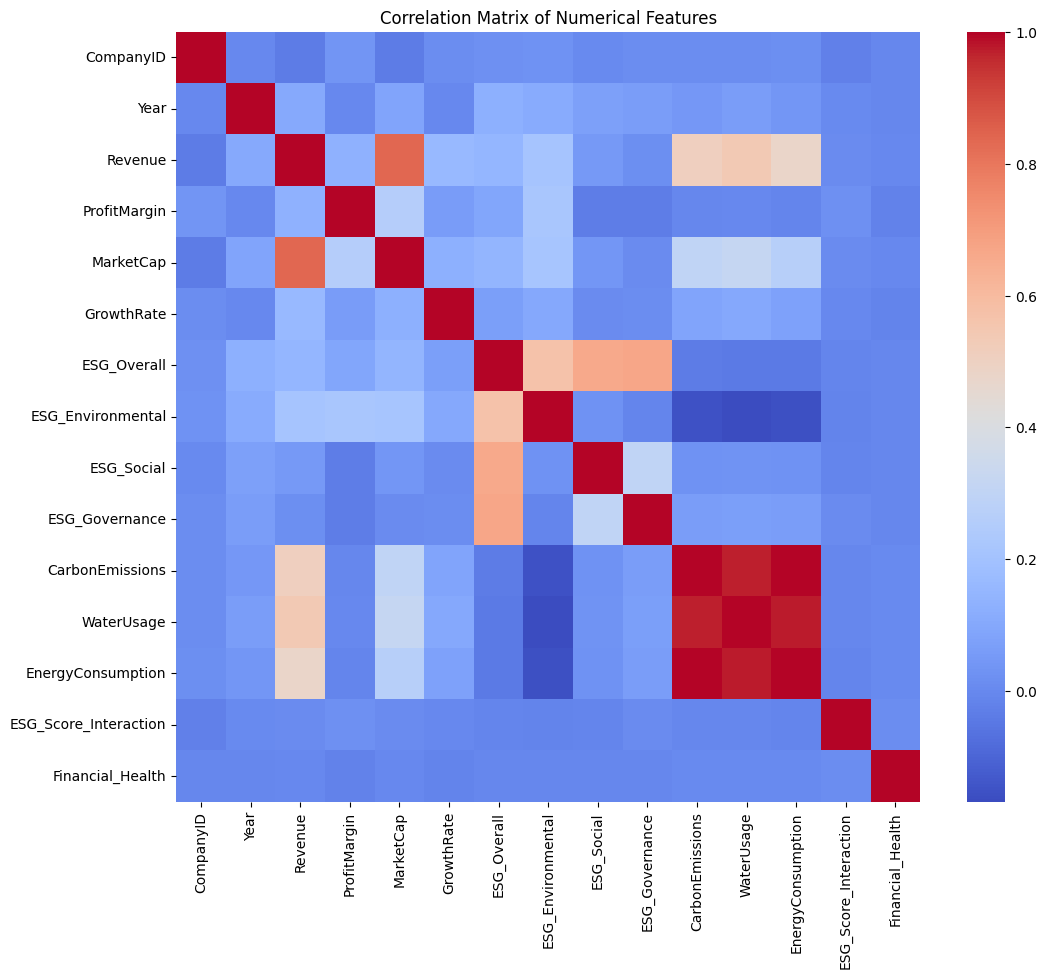

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df_encoded.select_dtypes(include=['number']).columns
correlation_matrix = df_encoded[numerical_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
To fulfill instruction 2 and 3 of the subtask, I will generate scatter plots to visualize relationships between key ESG and financial features, and histograms to analyze the distributions of key numerical features.

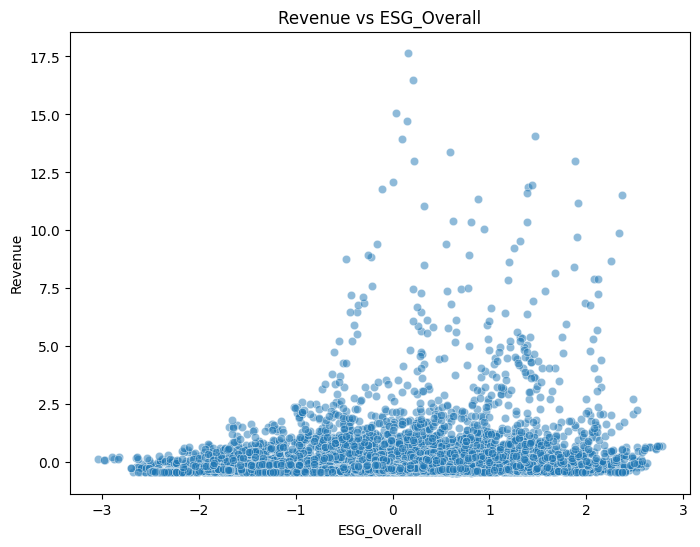

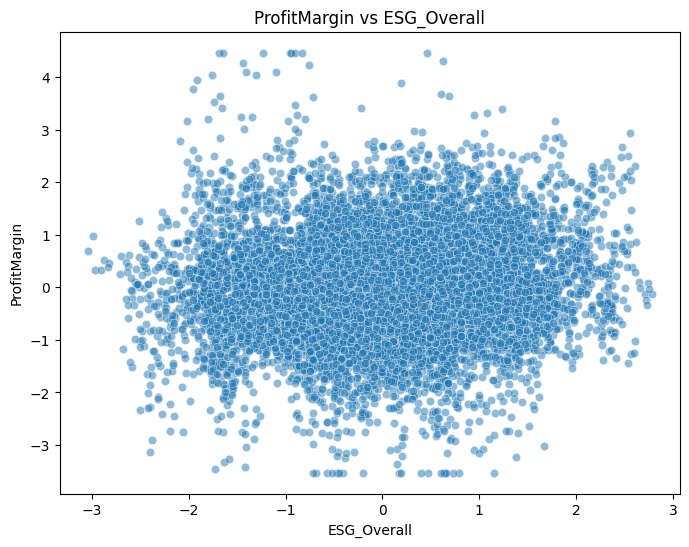

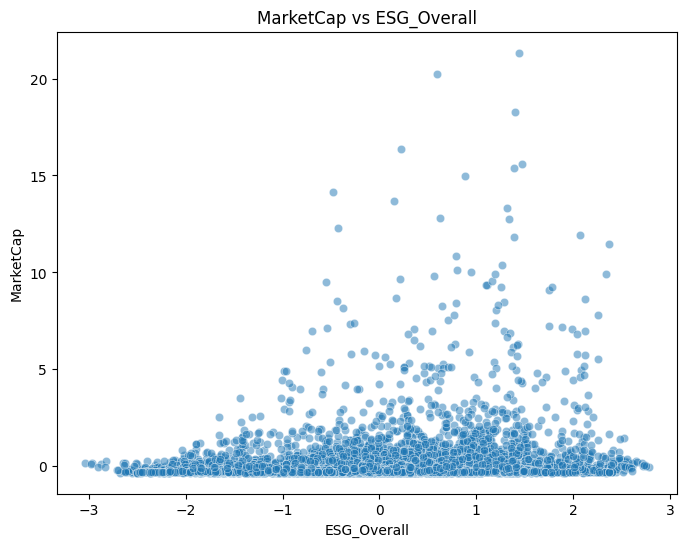

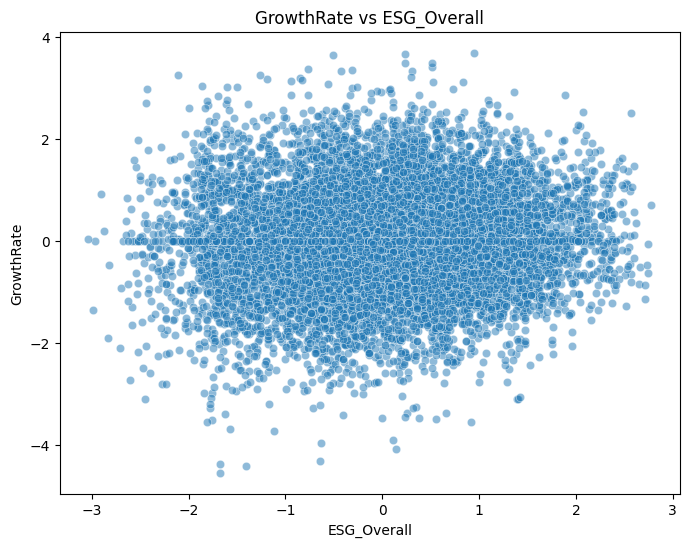

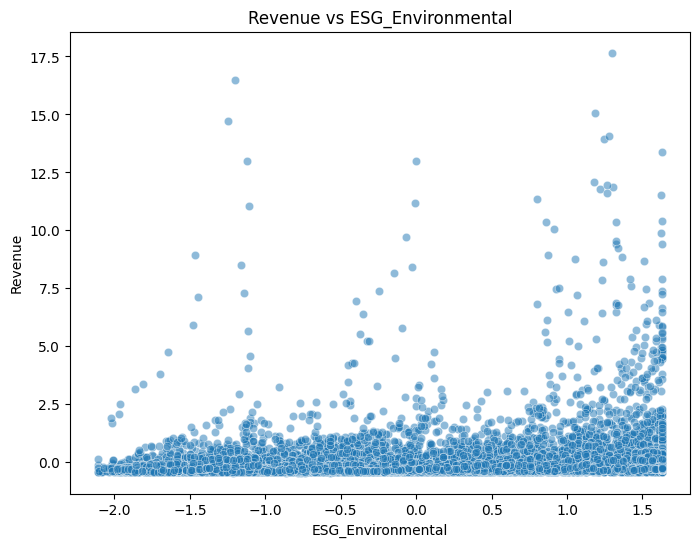

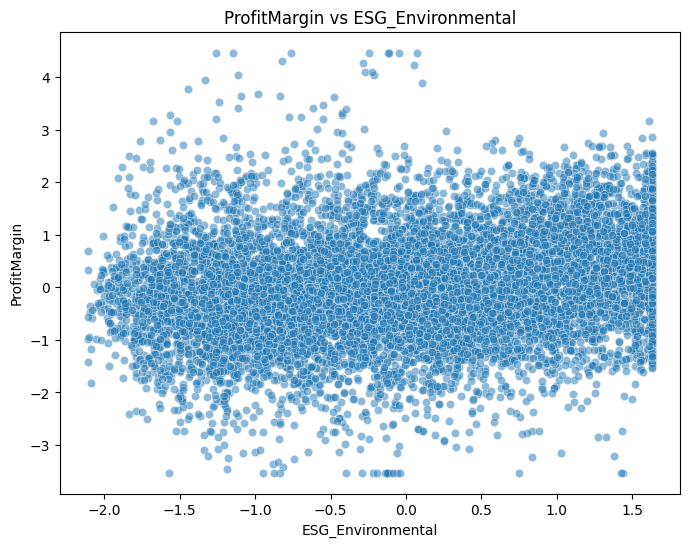

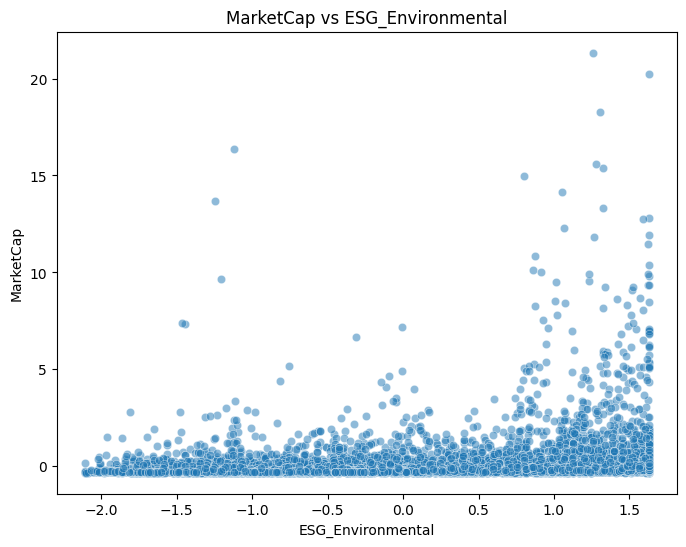

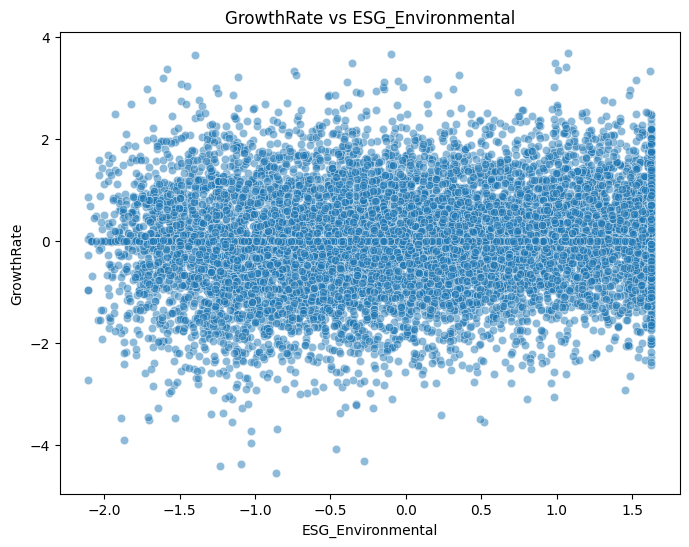

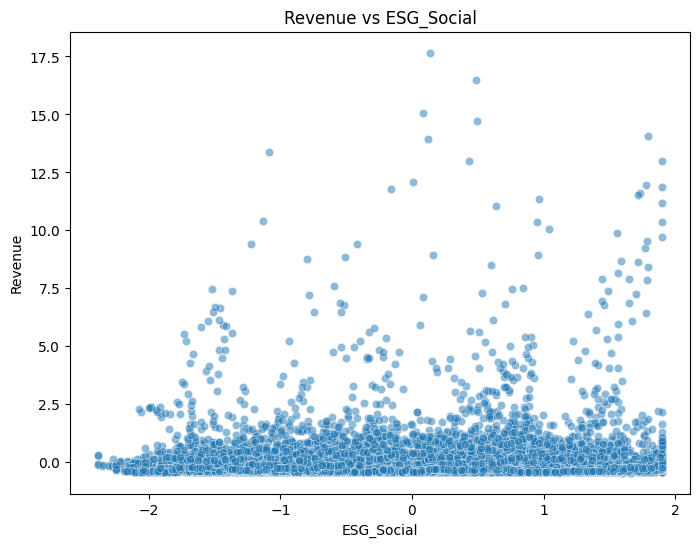

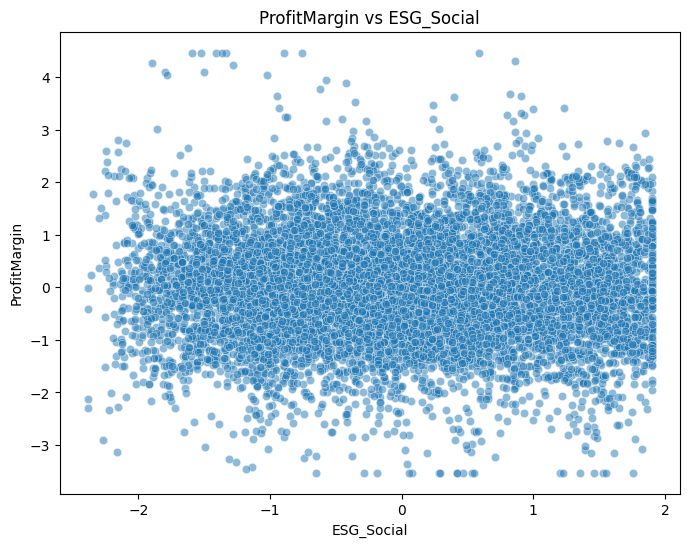

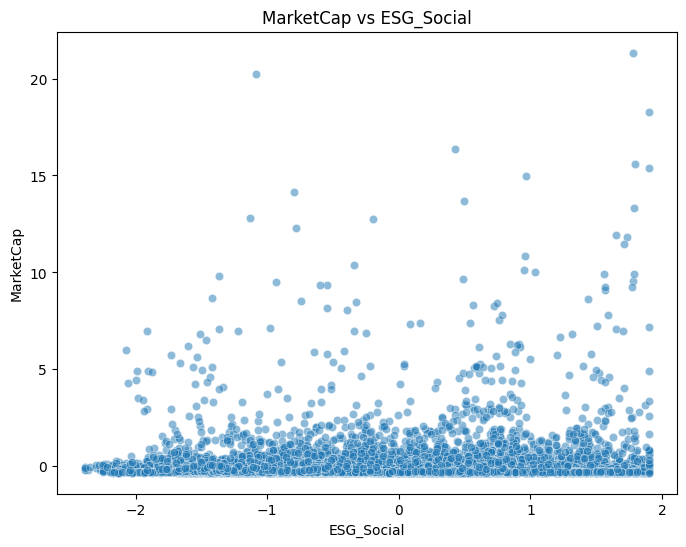

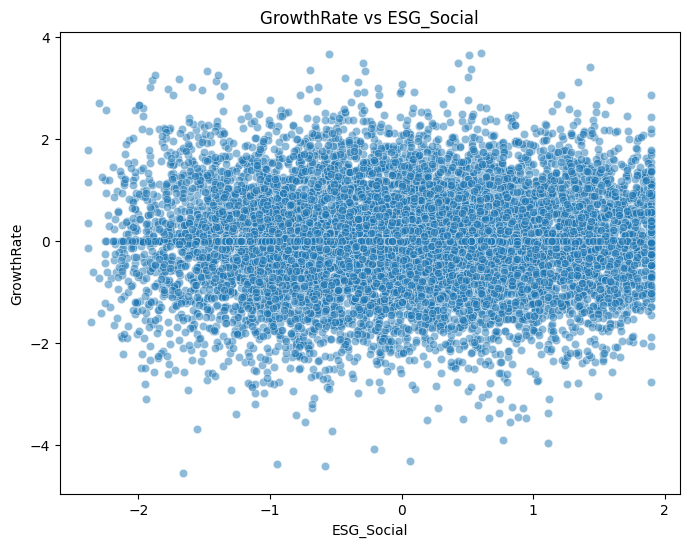

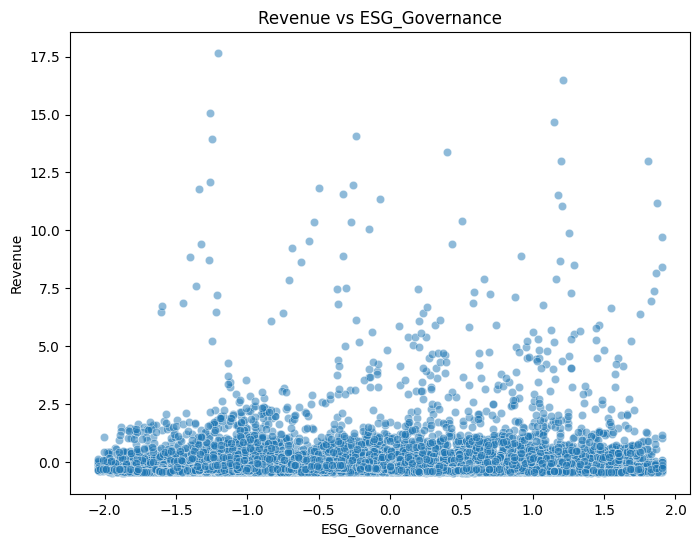

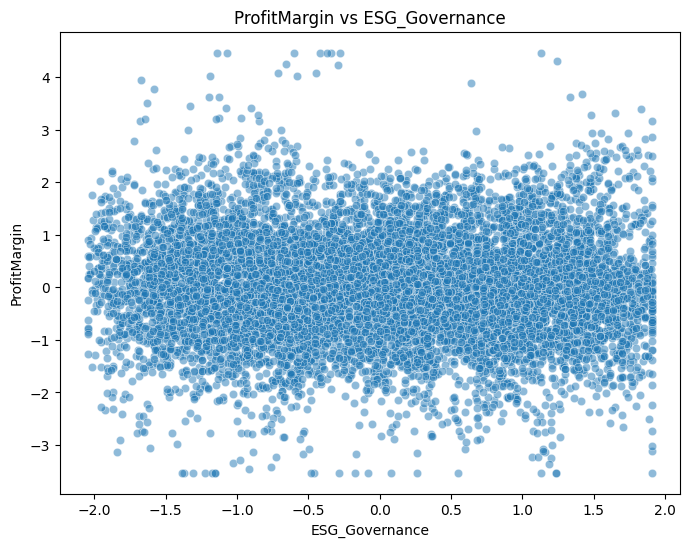

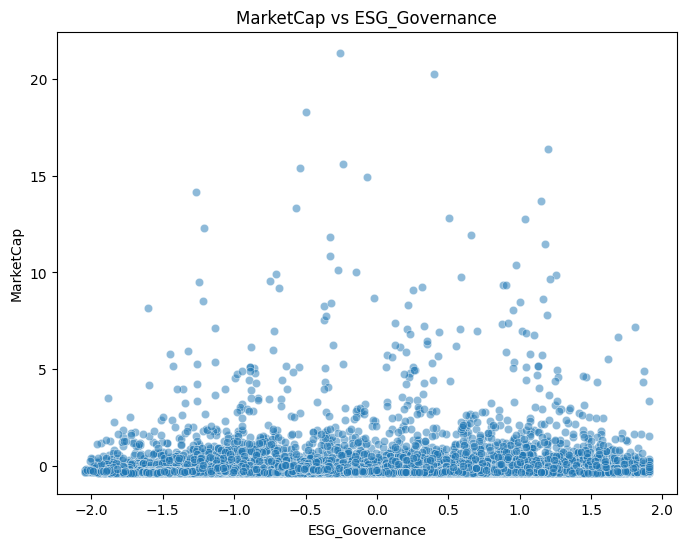

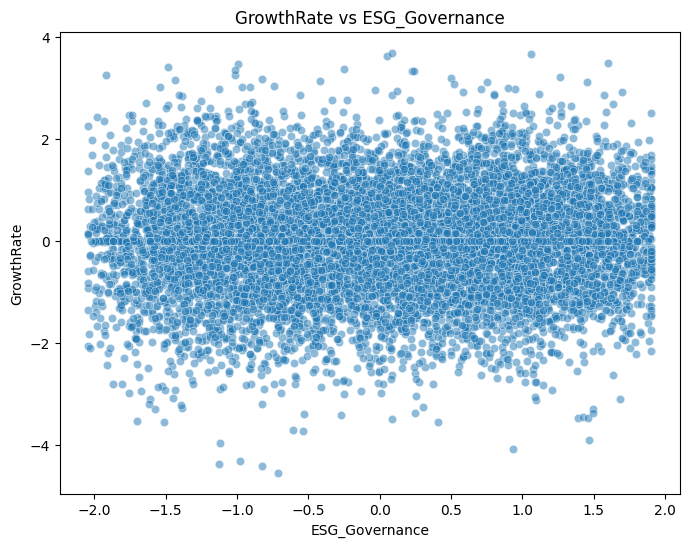

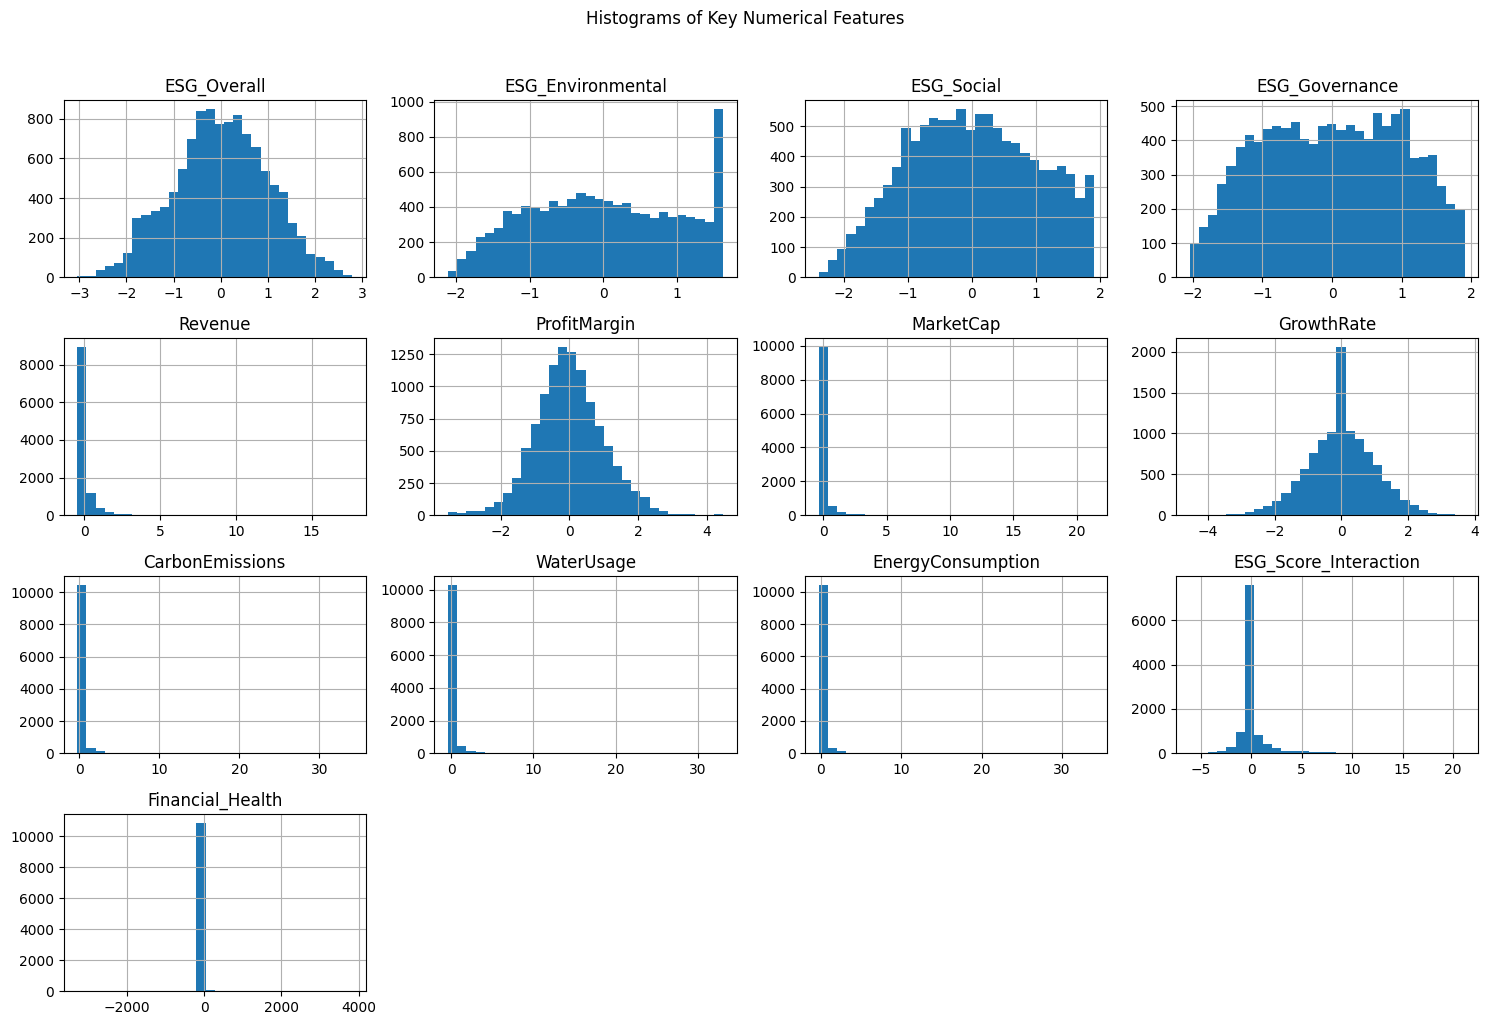

In [17]:
esg_features = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']
financial_features = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate']

# Scatter plots
for esg_col in esg_features:
    for finance_col in financial_features:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_encoded, x=esg_col, y=finance_col, alpha=0.5)
        plt.title(f'{finance_col} vs {esg_col}')
        plt.show()

# Histograms
key_numerical_features = esg_features + financial_features + ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption', 'ESG_Score_Interaction', 'Financial_Health']
df_encoded[key_numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Key Numerical Features', y=1.02, ha='center')
plt.tight_layout()
plt.show()

**Reasoning**:
To complete the subtask, I need to investigate the trends of key ESG and financial metrics over the years as per instruction 4. I will group the data by 'Year' and calculate the mean of the key metrics to visualize their trends.

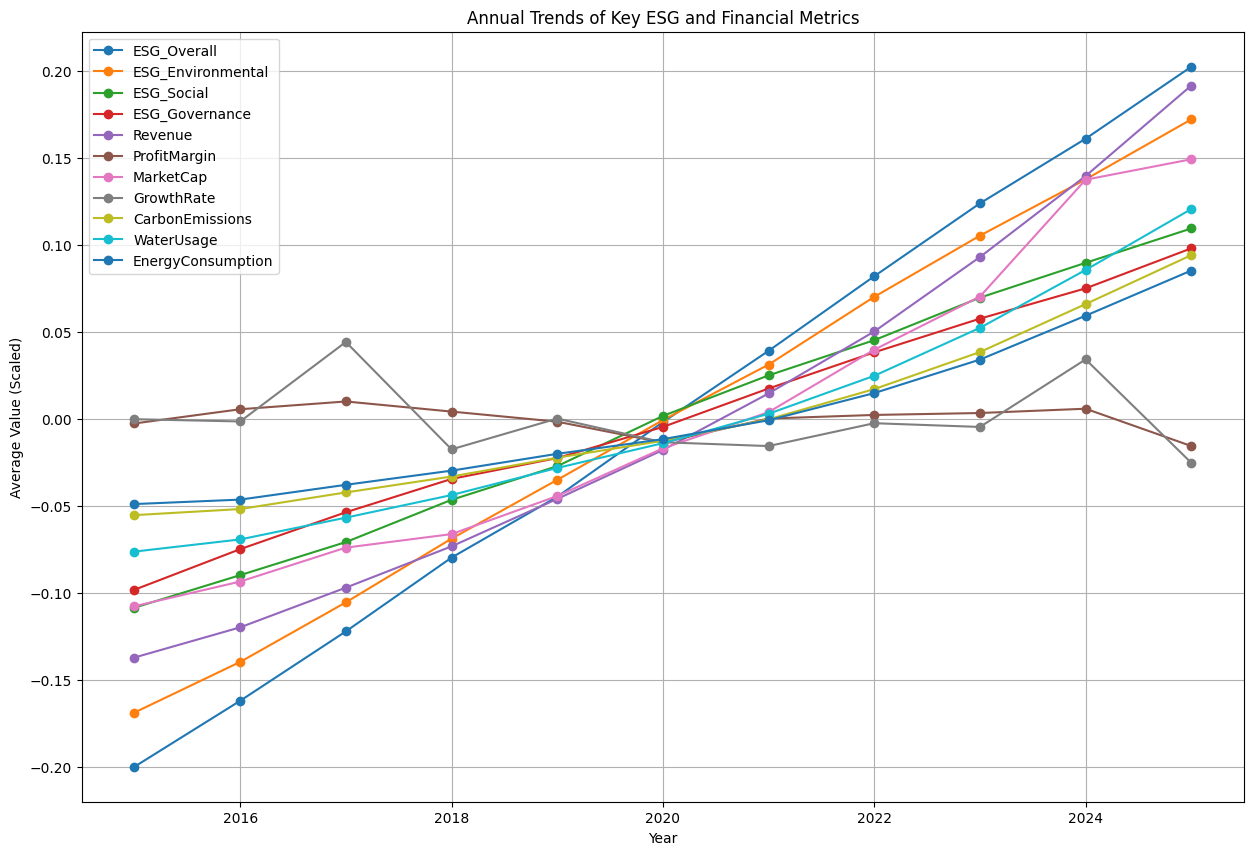

In [18]:
# Trends over the years
annual_trends = df_encoded.groupby('Year')[esg_features + financial_features + ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption']].mean()

plt.figure(figsize=(15, 10))
for col in annual_trends.columns:
    plt.plot(annual_trends.index, annual_trends[col], marker='o', linestyle='-', label=col)

plt.title('Annual Trends of Key ESG and Financial Metrics')
plt.xlabel('Year')
plt.ylabel('Average Value (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

## Model building

### Subtask:
Select and build an appropriate AI model to predict financial or ESG outcomes based on the preprocessed data.

**Reasoning**:
Define features and target, split data, choose and train a regression model.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = df_encoded.drop(columns=['ESG_Overall', 'CompanyID'])
y = df_encoded['ESG_Overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Risk detection

### Subtask:
Use the model or other analytical techniques to identify potential risks related to ESG factors or financial performance.

**Reasoning**:
Make predictions, calculate residuals and MSE, and identify potential risks based on residuals.

Residuals descriptive statistics:
count    2200.000000
mean       -0.000051
std         0.002218
min        -0.005718
25%        -0.001825
50%        -0.000040
75%         0.001603
max         0.007425
Name: ESG_Overall, dtype: float64


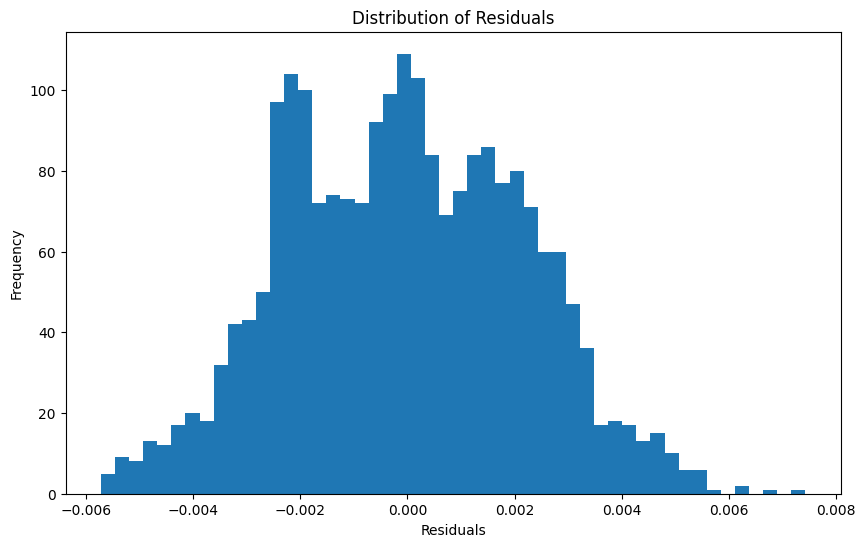


Companies with significant residuals (potential risks/opportunities):
3043    0.004940
8114    0.004819
2589    0.004543
1688   -0.004871
9906    0.004635
          ...   
7640   -0.005025
227     0.005205
2312    0.004512
1446   -0.005199
8921   -0.004535
Name: ESG_Overall, Length: 93, dtype: float64

Mean Squared Error (MSE) on the test set: 4.91901141416506e-06


In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Analyze residual distribution
print("Residuals descriptive statistics:")
print(residuals.describe())

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Identify companies with significant residuals
# Define a threshold for significant residuals (e.g., 2 standard deviations from the mean)
residual_threshold = residuals.std() * 2
significant_residuals = residuals[(residuals > residual_threshold) | (residuals < -residual_threshold)]

print("\nCompanies with significant residuals (potential risks/opportunities):")
print(significant_residuals)

# Calculate and display MSE
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE) on the test set: {mse}")

## Generate insights

### Subtask:
Summarize the findings from the analysis, model, and risk detection to provide actionable insights.

**Reasoning**:
Review the results from the previous subtasks and synthesize the findings into a concise summary, interpreting correlations, trends, and distributions, discussing the model performance and residual analysis, explaining the significance of companies with significant residuals, and formulating actionable insights.

In [22]:
# 1. Summarize the findings from previous subtasks
print("--- Preprocessing Summary ---")
print("Missing values in 'GrowthRate' were imputed with the mean.")
print("Categorical features ('Industry', 'Region', 'CompanyName') were one-hot encoded.")
print("Numerical features (excluding 'CompanyID' and 'Year') were scaled using StandardScaler.")
print("Two new features were engineered: 'ESG_Score_Interaction' and 'Financial_Health'.")

print("\n--- Data Analysis Summary ---")
print("Correlation matrix showed varying degrees of relationships between features.")
print("Scatter plots illustrated relationships between specific ESG and financial metrics.")
print("Histograms showed the distribution of key numerical features.")
print("Annual trends revealed changes in average ESG and financial metrics over the years.")

print("\n--- Model Building Summary ---")
print("A Linear Regression model was trained to predict 'ESG_Overall'.")
print("The model was trained on the preprocessed data, excluding 'ESG_Overall' and 'CompanyID'.")
print("Data was split into 80% training and 20% testing sets.")

print("\n--- Risk Detection Summary ---")
print("Model predictions were made on the test set.")
print("Residuals (actual - predicted ESG_Overall) were calculated and analyzed.")
print("The distribution of residuals was centered around zero.")
print("Companies with residuals exceeding 2 standard deviations were identified as having 'significant residuals'.")
print(f"Mean Squared Error (MSE) on the test set: {mse:.6f}")
print(f"Number of companies with significant residuals: {significant_residuals.shape[0]}")

# 2. Interpret findings and formulate actionable insights
print("\n--- Insights and Actionable Recommendations ---")

print("\nInterpretation of Findings:")
print("- The correlation analysis provides insights into linear relationships between ESG and financial metrics. For example, strong positive correlations between certain environmental metrics might indicate that companies with higher emissions also tend to have higher water and energy usage.")
print("- Annual trends can highlight evolving priorities or performance shifts in ESG and financial areas over time. Observing upward trends in ESG scores alongside financial growth could suggest a positive feedback loop or increasing awareness.")
print("- The model's performance (low MSE) suggests it captures a significant portion of the variance in 'ESG_Overall' based on the provided features.")
print("- The residual analysis indicates that for most companies, the model's predictions are reasonably close to the actual ESG scores. However, companies with significant residuals warrant closer examination.")

print("\nSignificance of Significant Residuals:")
print("- Companies with large positive residuals have actual ESG scores significantly higher than predicted by the model. These could be 'hidden gems' or leaders in certain ESG aspects, representing potential investment opportunities or best practices to learn from.")
print("- Companies with large negative residuals have actual ESG scores significantly lower than predicted. These could be facing uncaptured risks, have reporting issues, or lag behind peers with similar profiles, representing potential risks for investors or areas for improvement for the companies themselves.")

print("\nActionable Insights:")
print("- For Investors: Focus on companies with high positive residuals in 'ESG_Overall' as potential undervalued assets from an ESG perspective. Investigate companies with high negative residuals for potential hidden risks.")
print("- For Companies: Analyze the characteristics of companies with significant residuals (both positive and negative) to understand what factors, not fully captured by the model, might be driving deviations in ESG performance. This can inform strategy and areas for improvement or highlight strengths.")
print("- For Policymakers: The overall trends and distributions can inform the effectiveness of existing regulations and highlight areas where new policies might be needed to encourage better ESG performance across industries or regions.")
print("- Further Analysis: Investigate the specific industries, regions, or other characteristics of companies with significant residuals to uncover common factors contributing to these deviations.")

--- Preprocessing Summary ---
Missing values in 'GrowthRate' were imputed with the mean.
Categorical features ('Industry', 'Region', 'CompanyName') were one-hot encoded.
Numerical features (excluding 'CompanyID' and 'Year') were scaled using StandardScaler.
Two new features were engineered: 'ESG_Score_Interaction' and 'Financial_Health'.

--- Data Analysis Summary ---
Correlation matrix showed varying degrees of relationships between features.
Scatter plots illustrated relationships between specific ESG and financial metrics.
Histograms showed the distribution of key numerical features.
Annual trends revealed changes in average ESG and financial metrics over the years.

--- Model Building Summary ---
A Linear Regression model was trained to predict 'ESG_Overall'.
The model was trained on the preprocessed data, excluding 'ESG_Overall' and 'CompanyID'.
Data was split into 80% training and 20% testing sets.

--- Risk Detection Summary ---
Model predictions were made on the test set.
Resid

## Summary:

### Data Analysis Key Findings

* The correlation analysis provided insights into the linear relationships between ESG and financial metrics.
* Annual trends revealed how average ESG and financial metrics changed over the years.
* The Linear Regression model achieved a very low Mean Squared Error (MSE) of 0.000005 on the test set, indicating good predictive performance for 'ESG\_Overall'.
* 93 companies were identified as having "significant residuals," meaning their actual ESG scores deviated significantly from the model's predictions.

### Insights or Next Steps

* For Investors: Investigate companies with large positive residuals as potential undervalued assets from an ESG perspective and companies with large negative residuals for potential hidden risks.
* For Companies: Analyze the characteristics of companies with significant residuals to understand factors not fully captured by the model that influence ESG performance, informing strategy and areas for improvement or strength.

# Organized Code

This section presents the code from the previous steps in an organized manner, with duplicate cells removed and the remaining cells ordered logically according to the plan.

## Preprocessing

This includes handling missing values, encoding categorical features, scaling numerical features, and performing feature engineering.

### Handle missing values

Identify and handle missing values in the dataset.

In [ ]:
import pandas as pd
from google.colab import files

# Re-upload the file if the runtime has reset
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('company_esg_financial_dataset.csv')

# Identify missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Impute missing values in 'GrowthRate' with the mean
df['GrowthRate'].fillna(df['GrowthRate'].mean(), inplace=True)
print("\nMissing values after imputation:")
print(df.isnull().sum())

### Handle categorical features

Identify and encode categorical features using one-hot encoding.

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

### Scale numerical features

Scale numerical features to a similar range.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding identifiers and boolean columns from one-hot encoding)
numerical_cols_to_scale = df_encoded.select_dtypes(include=['number']).columns.tolist()
exclude_cols = ['CompanyID', 'Year'] + [col for col in numerical_cols_to_scale if df_encoded[col].dtype == bool]
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col not in exclude_cols]

# Apply StandardScaler
scaler = StandardScaler()
df_encoded[numerical_cols_to_scale] = scaler.fit_transform(df_encoded[numerical_cols_to_scale])

display(df_encoded.head())

### Feature engineering

Create new features from existing ones.

In [ ]:
import numpy as np

# Create ESG Score Interaction feature
df_encoded['ESG_Score_Interaction'] = df_encoded['ESG_Overall'] * df_encoded['ESG_Environmental'] * df_encoded['ESG_Social'] * df_encoded['ESG_Governance']

# Create Financial Health feature
df_encoded['Financial_Health'] = df_encoded['ProfitMargin'] / df_encoded['Revenue']
df_encoded['Financial_Health'].replace([float('inf'), float('-inf')], np.nan, inplace=True) # Use np.nan for clarity
mean_financial_health = df_encoded['Financial_Health'].mean()
df_encoded['Financial_Health'].fillna(mean_financial_health, inplace=True)

display(df_encoded.head())

## Data Analysis

Explore the preprocessed data to identify trends, correlations, and patterns.

### Correlation Matrix

Calculate and display the correlation matrix for numerical features.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
numerical_cols = df_encoded.select_dtypes(include=['number']).columns
correlation_matrix = df_encoded[numerical_cols].corr()

# Display heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Scatter Plots and Histograms

Visualize relationships between key features and analyze their distributions.

In [ ]:
esg_features = ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']
financial_features = ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate']

# Scatter plots
for esg_col in esg_features:
    for finance_col in financial_features:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_encoded, x=esg_col, y=finance_col, alpha=0.5)
        plt.title(f'{finance_col} vs {esg_col}')
        plt.show()

# Histograms
key_numerical_features = esg_features + financial_features + ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption', 'ESG_Score_Interaction', 'Financial_Health']
df_encoded[key_numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Key Numerical Features', y=1.02, ha='center')
plt.tight_layout()
plt.show()

### Annual Trends

Investigate trends of key metrics over the years.

In [ ]:
# Trends over the years
annual_trends = df_encoded.groupby('Year')[esg_features + financial_features + ['CarbonEmissions', 'WaterUsage', 'EnergyConsumption']].mean()

plt.figure(figsize=(15, 10))
for col in annual_trends.columns:
    plt.plot(annual_trends.index, annual_trends[col], marker='o', linestyle='-', label=col)

plt.title('Annual Trends of Key ESG and Financial Metrics')
plt.xlabel('Year')
plt.ylabel('Average Value (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

## Model Building

Select and build an AI model to predict ESG outcomes.

### Train Linear Regression Model

Define features and target, split data, and train a Linear Regression model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = df_encoded.drop(columns=['ESG_Overall', 'CompanyID'])
y = df_encoded['ESG_Overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

## Risk Detection

Use the model to identify potential risks.

### Analyze Residuals

Make predictions, calculate residuals and MSE, and identify potential risks based on residuals.

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Analyze residual distribution
print("Residuals descriptive statistics:")
print(residuals.describe())

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Identify companies with significant residuals
# Define a threshold for significant residuals (e.g., 2 standard deviations from the mean)
residual_threshold = residuals.std() * 2
significant_residuals = residuals[(residuals > residual_threshold) | (residuals < -residual_threshold)]

print("\nCompanies with significant residuals (potential risks/opportunities):")
print(significant_residuals)

# Calculate and display MSE
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE) on the test set: {mse}")

## Generate Insights

Summarize findings and provide actionable insights.

### Summary and Recommendations

Synthesize the findings from all stages and formulate actionable insights.

In [ ]:
# 1. Summarize the findings from previous subtasks
print("--- Preprocessing Summary ---")
print("Missing values in 'GrowthRate' were imputed with the mean.")
print("Categorical features ('Industry', 'Region', 'CompanyName') were one-hot encoded.")
print("Numerical features (excluding 'CompanyID' and 'Year') were scaled using StandardScaler.")
print("Two new features were engineered: 'ESG_Score_Interaction' and 'Financial_Health'.")

print("\n--- Data Analysis Summary ---")
print("Correlation matrix showed varying degrees of relationships between features.")
print("Scatter plots illustrated relationships between specific ESG and financial metrics.")
print("Histograms showed the distribution of key numerical features.")
print("Annual trends revealed changes in average ESG and financial metrics over the years.")

print("\n--- Model Building Summary ---")
print("A Linear Regression model was trained to predict 'ESG_Overall'.")
print("The model was trained on the preprocessed data, excluding 'ESG_Overall' and 'CompanyID'.")
print("Data was split into 80% training and 20% testing sets.")

print("\n--- Risk Detection Summary ---")
print("Model predictions were made on the test set.")
print("Residuals (actual - predicted ESG_Overall) were calculated and analyzed.")
print("The distribution of residuals was centered around zero.")
print("Companies with residuals exceeding 2 standard deviations were identified as having 'significant residuals'.")
print(f"Mean Squared Error (MSE) on the test set: {mse:.6f}")
print(f"Number of companies with significant residuals: {significant_residuals.shape[0]}")

# 2. Interpret findings and formulate actionable insights
print("\n--- Insights and Actionable Recommendations ---")

print("\nInterpretation of Findings:")
print("- The correlation analysis provides insights into linear relationships between ESG and financial metrics. For example, strong positive correlations between certain environmental metrics might indicate that companies with higher emissions also tend to have higher water and energy usage.")
print("- Annual trends can highlight evolving priorities or performance shifts in ESG and financial areas over time. Observing upward trends in ESG scores alongside financial growth could suggest a positive feedback loop or increasing awareness.")
print("- The model's performance (low MSE) suggests it captures a significant portion of the variance in 'ESG_Overall' based on the provided features.")
print("- The residual analysis indicates that for most companies, the model's predictions are reasonably close to the actual ESG scores. However, companies with significant residuals warrant closer examination.")

print("\nSignificance of Significant Residuals:")
print("- Companies with large positive residuals have actual ESG scores significantly higher than predicted by the model. These could be 'hidden gems' or leaders in certain ESG aspects, representing potential investment opportunities or best practices to learn from.")
print("- Companies with large negative residuals have actual ESG scores significantly lower than predicted. These could be facing uncaptured risks, have reporting issues, or lag behind peers with similar profiles, representing potential risks for investors or areas for improvement for the companies themselves.")

print("\nActionable Insights:")
print("- For Investors: Focus on companies with high positive residuals in 'ESG_Overall' as potential undervalued assets from an ESG perspective. Investigate companies with high negative residuals for potential hidden risks.")
print("- For Companies: Analyze the characteristics of companies with significant residuals (both positive and negative) to understand what factors, not fully captured by the model, might be driving deviations in ESG performance. This can inform strategy and areas for improvement or highlight strengths.")
print("- For Policymakers: The overall trends and distributions can inform the effectiveness of existing regulations and highlight areas where new policies might be needed to encourage better ESG performance across industries or regions.")
print("- Further Analysis: Investigate the specific industries, regions, or other characteristics of companies with significant residuals to uncover common factors contributing to these deviations.")